In [ ]:
# Maxim Chowdhury
# Dr. Staib

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
from random import randint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp
%matplotlib inline

In [59]:
NUM_SQUARES = 1000
X_train = []
for i in range(NUM_SQUARES):
    exp =np.zeros((28, 28))
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    if randint(0, 1) == 0: # sometie true
        exp = np.fliplr(exp)
    X_train.append(exp)

In [60]:
blurred_x = []
noisy_x = []
for x in X_train:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

In [61]:
X_train_aug = X_train.copy()
X_train_aug += blurred_x
X_train_aug += noisy_x
print(len(X_train))
print(len(X_train_aug))

1000
3000


In [62]:
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
print(len(X_train))

2000


In [63]:
blurred_x = []
noisy_x = []
for x in X_train[200:]:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

In [64]:
X_train_aug += X_train[200:].copy()
X_train_aug += blurred_x
X_train_aug += noisy_x
print(len(X_train))
print(len(X_train_aug))

2000
8400


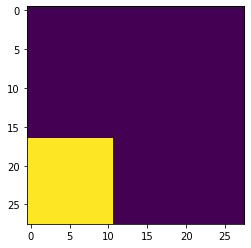

In [65]:
plt.imshow(X_train_aug[340]) # with blurr

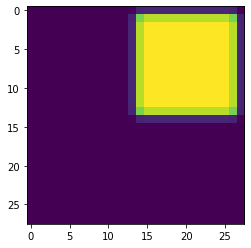

In [66]:
plt.imshow(X_train_aug[1100]) # with noisy

In [67]:
X_train = np.array(X_train)
X_train_aug = np.array(X_train_aug)
X_train_aug.shape

(8400, 28, 28)

In [68]:
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])
Y_train_aug = np.array([1 if i < NUM_SQUARES * 3 else 0 for i in range(NUM_SQUARES * 6)])

In [69]:
# shuffle training data
shuffler = np.random.permutation(NUM_SQUARES*2)
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]

In [70]:
# shuffle augmented data
shuffler = np.random.permutation(NUM_SQUARES*6)
X_train_aug = X_train_aug[shuffler]
Y_train_aug = Y_train_aug[shuffler]

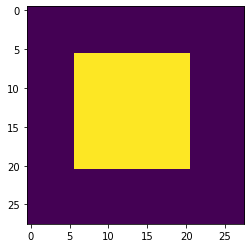

In [71]:
plt.imshow(X_train_aug[100])

In [72]:
# make training and testing data
NUM_TRAIN =int(NUM_SQUARES*2*0.85)
X_test = X_train[NUM_TRAIN:]
Y_test = Y_train[NUM_TRAIN:]
X_train = X_train[:NUM_TRAIN]
Y_train = Y_train[:NUM_TRAIN]

In [73]:
# make training and testing data
NUM_TRAIN =int(NUM_SQUARES*6*0.85)
X_test_aug = X_train_aug[NUM_TRAIN:]
Y_test_aug = Y_train_aug[NUM_TRAIN:]
X_train_aug = X_train_aug[:NUM_TRAIN]
Y_train_aug = Y_train_aug[:NUM_TRAIN]

In [74]:
# flatten 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_aug_flattened = X_train_aug.reshape(len(X_train_aug), 28*28)
X_test_aug_flattened = X_test_aug.reshape(len(X_test_aug), 28*28)

In [75]:
# addign a hidden layer
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7394
Epoch 2/10
54/54 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8229
Epoch 3/10
54/54 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8647
Epoch 4/10
54/54 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8847
Epoch 5/10
54/54 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9218
Epoch 6/10
54/54 [==============================] - 0s 1ms/step - loss: 0.2196 - accuracy: 0.9200
Epoch 7/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9371
Epoch 8/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.9435
Epoch 9/10
54/54 [==============================] - 0s 922us/step - loss: 0.1261 - accuracy: 0.9500
Epoch 10/10
54/54 [==============================] - 0s 884us/step - loss: 0.1213 - accuracy: 0.9488


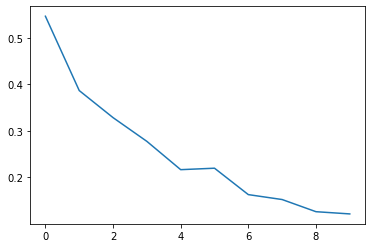

In [76]:
losses = history.history['loss']
timeline = np.arange(len(losses))
pp.plot(timeline, losses)
pp.show()

In [77]:
model.evaluate(X_test_flattened, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8867


[0.37757763266563416, 0.8866666555404663]

In [78]:
# addign a hidden layer
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_aug_flattened, Y_train_aug, epochs=20, callbacks=[history])

Epoch 1/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6202
Epoch 2/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.6604
Epoch 3/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.6798
Epoch 4/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.6818
Epoch 5/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.6822
Epoch 6/20
160/160 [==============================] - 0s 976us/step - loss: 0.4956 - accuracy: 0.6894
Epoch 7/20
160/160 [==============================] - 0s 923us/step - loss: 0.4849 - accuracy: 0.6953
Epoch 8/20
160/160 [==============================] - 0s 975us/step - loss: 0.4814 - accuracy: 0.6945
Epoch 9/20
160/160 [==============================] - 0s 969us/step - loss: 0.4706 - accuracy: 0.6945
Epoch 10/20
160/160 [==============================] - 0s 953us/step - loss: 0.4696 - accura

In [79]:
losses = history.history['loss']
timeline = np.arange(len(losses))

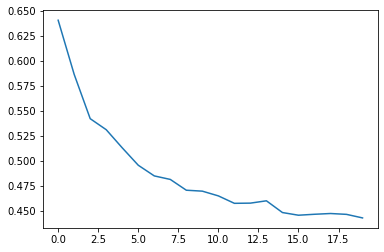

In [80]:
pp.plot(timeline, losses)
pp.show()